<h1> <center> Classification Model for Analyzing Product Sentiment  </h1> <center>
    <h2> Using turi create </h2>
    
Source: [ML Foundationsx, Washington University-Coursera](https://www.coursera.org/learn/ml-foundations/supplement/phb1M/analyzing-product-sentiment-assignment)

In [1]:
import turicreate

# Read product review data

In [2]:
products = turicreate.SFrame('./data/amazon_baby.sframe')

# Explore data

In [3]:
products

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


In [4]:
products.groupby('name',operations={'count_name':turicreate.aggregate.COUNT()}).sort('count_name',ascending=False)

name,count_name
Vulli Sophie the GiraffeTeether ...,785
"Simple Wishes Hands-FreeBreastpump Bra, Pink, ...",562
Infant Optics DXR-5 2.4GHz Digital Video Baby ...,561
Baby Einstein Take AlongTunes ...,547
Cloud b TwilightConstellation Night ...,520
"Fisher-Price BoosterSeat, Blue/Green/Gray ...",489
Fisher-Price RainforestJumperoo ...,450
"Graco Nautilus 3-in-1 CarSeat, Matrix ...",419
Leachco Snoogle TotalBody Pillow ...,388
"Regalo Easy Step WalkThru Gate, White ...",374


In [5]:
#products['name'].show()

# Examine the reivews for the most-reviewed product

In [6]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [7]:
giraffe_reviews

name,review,rating
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0


In [8]:
len(giraffe_reviews)

785

In [9]:
giraffe_reviews['rating'].show()

Materializing SArray

# <center> Building a sentiment classifier <center>

## <center> Build word count vectors <center> 

In [10]:
products['word_count'] = turicreate.text_analytics.count_words(products['review'])

In [11]:
products

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'handles': 1.0,'stripping': 1.0, ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ..."
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ..."
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ..."
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ..."
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ..."
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ..."
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ..."


<br>

##### Count selected words

In [12]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

number of times each word shows up in a review

In [13]:
# function to count number of appearances of a word in a review
def count_word(word, word_count_i):
    if word in set(word_count_i.keys()): #products['word_count'][i].keys())
        return word_count_i[word]
    else:
        return 0

# https://stackoverflow.com/questions/33204763/how-to-pass-multiple-arguments-to-the-apply-function
for word in selected_words:
    products[word] = products['word_count'].apply(lambda dict_x: count_word(word_count_i=dict_x, word=word))

In [14]:
# number of times the word 'awesome' shows up in a review
products['awesome']

dtype: float
Rows: 183531
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ... ]

In [15]:
#products[products['awesome']!=0]

In [16]:
counts_dict = dict()

for word in selected_words:
    print(word, products[word].sum())
    counts_dict[word] = products[word].sum()    

awesome 4075.0
great 59536.0
fantastic 1765.0
amazing 2726.0
love 43867.0
horrible 1245
bad 4950.0
terrible 1282
awful 753
wow 461
hate 1285


#### get the maximum value in the dict

In [17]:
# option 1: using zip
max(zip(counts_dict.values(), counts_dict.keys()))

(59536.0, 'great')

In [18]:
# option 2: using get() in the key
max(counts_dict, key=counts_dict.get)

'great'

In [19]:
# option 3: using a lambda function that gets the value corresponding to each key
max(counts_dict, key=lambda x: counts_dict[x])

'great'

In [20]:
# option 3a: same as before but making explicit that the lambda is iterating over the keys
max(counts_dict.keys(), key=lambda x: counts_dict[x])

'great'

In [21]:
# Note: 3a does not work when using values or items because the dict can only be subscripted by its keys
# This gives an error
# max(counts_dict.items(), key=lambda x: counts_dict[x])

In [22]:
# option 4: get the items and use a lambda to get the value from each pair in items
max(counts_dict.items(),key=lambda x: x[1])

('great', 59536.0)

In [23]:
# Note: using the lambda in opt 4 but getting the keys does not give an error. 
# It will get the max based on the second letter of the key 
max(counts_dict.keys(),key=lambda x: x[1])

'awesome'

In [24]:
min(counts_dict, key=lambda x: counts_dict[x])

'wow'

## <center> Define what is positive and negative sentiment <center>

In [25]:
products['rating'].show()

Materializing SArray

In [26]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [27]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = products['rating'] >= 4

In [28]:
products

name,review,rating,word_count,awesome,great
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ...",0.0,0.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ...",0.0,0.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ...",0.0,0.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",0.0,1.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",0.0,1.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",0.0,0.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",0.0,0.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",0.0,0.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",0.0,0.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",0.0,0.0


In [29]:
products['sentiment'].show()

Materializing SArray

# Train our sentiment classifier

In [30]:
train_data,test_data = products.random_split(.8,seed=0)

In [31]:
sentiment_model = turicreate.logistic_classifier.create(train_data,target='sentiment', features=['word_count'], validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 57356

Number of coefficients      : 57357

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.426223     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 2.088319     | 0.931359          | 0.911362            |

| 2         | 11       | 2.669978  | 2.441532     | 0.938650          | 0.916466            |

| 3         | 12       | 2.669978  | 2.675885     | 0.927417          | 0.901814            |

| 4         | 14       | 1.326072  | 2.964348     | 0.945200          | 0.918088            |

| 9         | 20       | 1.326072  | 4.055568     | 0.977654          | 0.917698            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

##### Train with only selected_words


In [32]:
selected_words_model = turicreate.logistic_classifier.create(train_data,target='sentiment', features=selected_words, validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.054661     | 0.847401          | 0.845874            |

| 2         | 3        | 0.090134     | 0.847514          | 0.846085            |

| 3         | 4        | 0.124885     | 0.847626          | 0.846115            |

| 4         | 5        | 0.157588     | 0.847708          | 0.846385            |

| 5         | 6        | 0.189364     | 0.847708          | 0.846385            |

| 6         | 7        | 0.221039     | 0.847708          | 0.846385            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [33]:
coefficients = selected_words_model.coefficients
coefficients

name,index,class,value,stderr
(intercept),None,1,1.3365913848877602,0.008929969787656582
awesome,None,1,1.1335346660341417,0.08399643983187537
great,None,1,0.8630655001196592,0.01895505244437695
fantastic,None,1,0.885804756881427,0.11167591293399677
amazing,None,1,1.1000933113660258,0.09954776260465989
love,None,1,1.359268866922512,0.02806830015209923
horrible,None,1,-2.2513352367590955,0.08020249388788439
bad,None,1,-0.991477880065059,0.038484286646990606
terrible,None,1,-2.2236614360851292,0.07731736203785751
awful,None,1,-2.0529082040313544,0.10099735435259255


In [34]:
a = coefficients.sort(key_column_names='value', ascending=True)
a.print_rows(num_rows=12)

+-------------+-------+-------+-----------------------+----------------------+
|     name    | index | class |         value         |        stderr        |
+-------------+-------+-------+-----------------------+----------------------+
|   horrible  |  None |   1   |  -2.2513352367590955  | 0.08020249388788439  |
|   terrible  |  None |   1   |  -2.2236614360851292  | 0.07731736203785751  |
|    awful    |  None |   1   |  -2.0529082040313544  | 0.10099735435259255  |
|     hate    |  None |   1   |  -1.3484407222463144  | 0.07715698604297334  |
|     bad     |  None |   1   |   -0.991477880065059  | 0.038484286646990606 |
|     wow     |  None |   1   | -0.009538236067681735 |  0.1604641122471166  |
|    great    |  None |   1   |   0.8630655001196592  | 0.01895505244437695  |
|  fantastic  |  None |   1   |   0.885804756881427   | 0.11167591293399677  |
|   amazing   |  None |   1   |   1.1000933113660258  | 0.09954776260465989  |
|   awesome   |  None |   1   |   1.1335346660341417

## Evaluate the sentiment model

In [35]:
? sentiment_model.evaluate

In [36]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9176975738650012,
 'auc': 0.9258242975424673,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |  1397 |
 |      1       |        0        |  1344 |
 |      0       |        0        |  3931 |
 |      1       |        1        | 26632 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.951057941255245,
 'log_loss': 0.3304787187240906,
 'precision': 0.9501587641371436,
 'recall': 0.9519588218472976,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0  

In [37]:
ev = sentiment_model.evaluate(test_data, metric='roc_curve')
ev

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0    |        1.0         |        1.0         | 27976 | 5328 |
 |   0.001   | 0.698948948948949  | 0.9933514440949385 | 27976 | 5328 |
 |   0.002   | 0.6619744744744744 | 0.9922076065198742 | 27976 | 5328 |
 |   0.003   | 0.6385135135135135 | 0.9909922790963683 | 27976 | 5328 |
 |   0.004   |  0.62256006006006  | 0.9903846153846154 | 27976 | 5328 |
 |   0.005   | 0.6112987987987988 | 0.989848441521304  | 27976 | 5328 |
 |   0.006   | 0.6002252252252253 | 0.9894195024306548 | 27976 | 5328 |
 |   0.007   | 0.589527027027027  | 0.9888475836431226 | 27976 | 5328 |
 |   0.008   | 0.5816441441441441 | 0.9883828996282528 | 27976 | 5328 |
 |   0.009   | 0.574512012012012

In [38]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.8463848186404036,
 'auc': 0.6935096220934976,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  159  |
 |      0       |        0        |  371  |
 |      0       |        1        |  4957 |
 |      1       |        1        | 27817 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9157860082304526,
 'log_loss': 0.3962265467087378,
 'precision': 0.8487520595594068,
 'recall': 0.9943165570488991,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 1001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328 

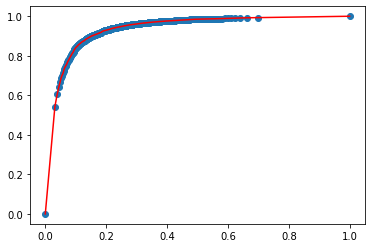

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(ev['roc_curve']['fpr'], ev['roc_curve']['tpr'])
plt.plot(ev['roc_curve']['fpr'], ev['roc_curve']['tpr'],'-', color='red')

# Apply the sentiment classifier to better understand the Giraffe reviews

In [40]:
products['predicted_sentiment'] = sentiment_model.predict(products, output_type = 'probability')

In [41]:
products

name,review,rating,word_count,awesome,great
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'recommend': 1.0,'disappointed': 1.0, ...",0.0,0.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'quilt': 1.0, 'the':1.0, 'than': 1.0, 'fu ...",0.0,0.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0,"{'tool': 1.0, 'clever':1.0, 'binky': 2.0, ...",0.0,0.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0,"{'rock': 1.0, 'many':1.0, 'headaches': 1.0, ...",0.0,1.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0,"{'thumb': 1.0, 'or': 1.0,'break': 1.0, 'trying': ...",0.0,1.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0,"{'for': 1.0, 'barnes':1.0, 'at': 1.0, 'is': ...",0.0,0.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0,"{'right': 1.0, 'because':1.0, 'questions': 1.0, ...",0.0,0.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0,"{'like': 1.0, 'and': 1.0,'changes': 1.0, 'the': ...",0.0,0.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0,"{'in': 1.0, 'pages': 1.0,'out': 1.0, 'run': 1.0, ...",0.0,0.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",I love this journal andour nanny uses it ...,4.0,"{'tracker': 1.0, 'now':1.0, 'its': 1.0, 'sti ...",0.0,0.0


In [42]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [43]:
giraffe_reviews

name,review,rating,word_count,awesome,great
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",0.0,1.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",0.0,1.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,This product is without adoubt the best on the ...,5.0,"{'belongs': 1.0, 'dog':1.0, 'if': 1.0, 'bewa ...",0.0,0.0


# Sort the Giraffe reviews according to predicted sentiment

In [44]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [45]:
giraffe_reviews

name,review,rating,word_count,awesome,great
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'11': 1.0, 'prisrob':1.0, '12': 1.0, 'who': ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,I'll be honest...I boughtthis toy because all the ...,4.0,"{'around': 1.0,'explore': 1.0, 'they': ...",0.0,1.0
Vulli Sophie the GiraffeTeether ...,As a mother of 16monthold twins; I bought ...,5.0,"{'will': 1.0, '15months':1.0, 'would': 2.0, ...",0.0,2.0
Vulli Sophie the GiraffeTeether ...,We got this littlegiraffe as a gift from a ...,5.0,"{'out': 1.0, 've': 1.0,'would': 1.0, 'enough': ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,"As every mom knows, youalways want to give your ...",5.0,"{'whether': 1.0,'neutral': 1.0, 'gend ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,My Mom-in-Law boughtSophie for my son whe ...,5.0,"{'penny': 1.0, 'little':1.0, 'perfect': 1.0, ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,"My 4 month old son isteething, and I've tried ...",4.0,"{'worth': 1.0, 'works':1.0, 'teether': 1.0, ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,Let me just start off byaddressing the choking ...,5.0,"{'question': 1.0, 'must':1.0, 'overall': 1.0, ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'makers': 1.0, 'or':1.0, 'take': 1.0, 'can': ...",0.0,0.0
Vulli Sophie the GiraffeTeether ...,"I admit, I didn't getSophie the Giraffe at ...",4.0,"{'dye': 1.0, 'of': 1.0,'cause': 1.0, 'fade': ...",0.0,1.0


In [46]:
giraffe_reviews.tail()

name,review,rating,word_count,awesome,great,fantastic
Vulli Sophie the GiraffeTeether ...,My 7 1/2 month oldgrandbaby was sittng up ...,1.0,"{'sopie': 1.0, 'with':1.0, 'be': 1.0, 'shou ...",0.0,0.0,0.0
Vulli Sophie the GiraffeTeether ...,I was so looking forwardto getting this for my ...,1.0,"{'amazon': 1.0, 'back':1.0, 'by': 1.0, 'more': ...",0.0,0.0,0.0
Vulli Sophie the GiraffeTeether ...,Received the product andsmells like cheap rub ...,1.0,"{'was': 1.0, 'as': 1.0,'still': 1.0, 'but': ...",0.0,0.0,0.0
Vulli Sophie the GiraffeTeether ...,I got one of these as ashowe gift that my baby ...,1.0,"{'typical': 1.0, 'paint':1.0, 'came': 1.0, 'mi ...",0.0,0.0,0.0
Vulli Sophie the GiraffeTeether ...,When we first got it Ithought did my ...,2.0,"{'mom': 1.0, 'teethers':1.0, 'btw': 1.0, 'oth ...",0.0,0.0,0.0
Vulli Sophie the GiraffeTeether ...,When I received this thepaint was peeling off in ...,1.0,"{'worth': 1.0, 'for':1.0, 'about': 1.0, ...",0.0,1.0,0.0
Vulli Sophie the GiraffeTeether ...,"""Sophie the Giraffe"" hastested positive for ...",1.0,"{'ingest': 1.0, 'they':1.0, 'naturally': 1.0, ...",0.0,0.0,0.0
Vulli Sophie the GiraffeTeether ...,"My son (now 2.5) LOVEDhis Sophie, and I bought ...",1.0,"{'exaggerated': 1.0, 'a':3.0, 't': 2.0, 'stran ...",0.0,0.0,0.0
Vulli Sophie the GiraffeTeether ...,I wanted to love thisproduct and was excited ...,1.0,"{'risk': 1.0, 'ready':1.0, 'bummed': 1.0, ...",0.0,0.0,0.0
Vulli Sophie the GiraffeTeether ...,This children's toy isnostalgic and very cute. ...,1.0,"{'amazon': 1.0, 'from':1.0, 'one': 1.0, 'by': ...",0.0,0.0,0.0


## Show the most positive reviews

In [47]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [48]:
giraffe_reviews[1]['review']

'I\'ll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the "hip parent" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn\'t know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy\'s lap to say hello.People have stopped and commented on Sophie and to the

# Most negative reivews

In [49]:
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [50]:
giraffe_reviews[-2]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

### Interpret difference in performance between models

In [51]:
# get the reviews for 
diaper_champ_reviews = products[products['name']== 'Baby Trend Diaper Champ']
diaper_champ_reviews.sort('predicted_sentiment', ascending=False)
diaper_champ_reviews

name,review,rating,word_count,awesome,great,fantastic
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,"{'convenient': 1.0,'more': 1.0, 'trash': ...",0.0,0.0,0.0
Baby Trend Diaper Champ,"My husband and I selectedthe Diaper ""Champ"" ma ...",1.0,"{'system': 1.0, 'try':1.0, 're': 1.0, 'still': ...",0.0,0.0,0.0
Baby Trend Diaper Champ,Excellent diaper disposalunit. I used it in ...,5.0,"{'nose': 1.0, 'for': 2.0,'investment': 1.0, ...",0.0,0.0,0.0
Baby Trend Diaper Champ,We love our diaper champ.It is very easy to use ...,5.0,"{'out': 1.0, 'pull': 1.0,'open': 1.0, 'pail': ...",0.0,0.0,0.0
Baby Trend Diaper Champ,Two girlfriends and twofamily members put me ...,5.0,"{'winter': 1.0,'outside': 1.0, 'day': ...",0.0,0.0,0.0
Baby Trend Diaper Champ,I waited to review thisuntil I saw how it ...,4.0,"{'mom': 1.0, 'huge': 1.0,'special': 1.0, 'good': ...",0.0,0.0,0.0
Baby Trend Diaper Champ,I have had a diaper geniefor almost 4 years since ...,1.0,"{'yuck': 1.0, 'clean':1.0, 'trash': 3.0, 'is': ...",0.0,0.0,0.0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",0.0,0.0,0.0
Baby Trend Diaper Champ,I am so glad I got theDiaper Champ instead of ...,5.0,"{'best': 1.0, 'that':1.0, 'will': 1.0, ...",0.0,0.0,0.0
Baby Trend Diaper Champ,We had 2 diaper Genie'sboth given to us as a ...,4.0,"{'no': 1.0, 'regular':1.0, 'part': 1.0, ...",0.0,0.0,0.0


In [52]:
selected_words_model.predict(diaper_champ_reviews[0:1], output_type='probability')

dtype: float
Rows: 1
[0.7919288370624461]

In [53]:
diaper_champ_reviews[0:1]['review']

dtype: str
Rows: 1
["Ok - newsflash.  Diapers are just smelly.  We've had this pail for 2.5 years now.  It was our first and primary one.  There were no major smell problems until after one year, when our son started eating solids.  Also, we change the bag twice weekly as 3 days is about the max for smell-containment.  Around 20-22 months we started shopping for a container that would be less smelly and didn't find one as good.  (We have a cheaper one upstairs which broke immediately and always stunk!)  We finally just put the Diaper Champ in the attic a few months ago and use the cheap one with the flip-up lid - mainly since the cheapo fits inside the cabinet and we didn't notice a big difference in smell-control.  (The most helpful action is to tie the dirty diapers inside a small plastic bag before putting them in the pail.)A couple of our friends have this pail and were pleased until the children started eating solid food and things got stinkier - but that's pretty much the consens

In [54]:
diaper_champ_reviews[0:1]['word_count']

dtype: dict
Rows: 1
[{'convenient': 1.0, 'more': 1.0, 'trash': 1.0, 'regular': 1.0, 'so': 1.0, 'can': 1.0, 'fact': 1.0, 'however': 1.0, 'some': 1.0, 'gets': 1.0, 'frequently': 1.0, 'babysitters': 1.0, 'grandmothers': 1.0, 'intuitive': 1.0, 'isn': 1.0, 'star': 1.0, 'knocked': 1.0, 'pails': 1.0, 'different': 1.0, 'on': 1.0, 'many': 1.0, 'any': 1.0, 'according': 1.0, 'consensus': 1.0, 's': 1.0, 'but': 1.0, 'stinkier': 1.0, 'you': 1.0, 'starts': 1.0, 'things': 1.0, 'food': 1.0, 'solid': 1.0, 'least': 1.0, 'children': 1.0, 'friends': 1.0, 'couple': 1.0, 'before': 1.0, 'plastic': 1.0, 'tie': 1.0, 'mechanism': 1.0, 'action': 1.0, 'most': 1.0, 'days': 1.0, '3': 1.0, 'much': 2.0, 'put': 1.0, 'bag': 3.0, 'around': 1.0, '2': 1.0, 'getting': 1.0, 'solids': 1.0, 'after': 1.0, 'when': 2.0, 'about': 1.0, 'there': 2.0, 'pretty': 1.0, 'to': 3.0, 'pail': 4.0, 'immediately': 1.0, 'no': 1.0, 'years': 1.0, 'also': 1.0, 've': 2.0, 'would': 1.0, 'smell': 4.0, 'finally': 1.0, 'control': 1.0, 'small': 1.0, 'a'

In [55]:
test_dict = {'convenient': 1.0, 'more': 1.0, 'trash': 1.0, 'regular': 1.0, 'so': 1.0, 'can': 1.0, 'fact': 1.0, 'however': 1.0, 'some': 1.0, 'gets': 1.0, 'frequently': 1.0, 'babysitters': 1.0, 'grandmothers': 1.0, 'intuitive': 1.0, 'isn': 1.0, 'star': 1.0, 'knocked': 1.0, 'pails': 1.0, 'different': 1.0, 'on': 1.0, 'many': 1.0, 'any': 1.0, 'according': 1.0, 'consensus': 1.0, 's': 1.0, 'but': 1.0, 'stinkier': 1.0, 'you': 1.0, 'starts': 1.0, 'things': 1.0, 'food': 1.0, 'solid': 1.0, 'least': 1.0, 'children': 1.0, 'friends': 1.0, 'couple': 1.0, 'before': 1.0, 'plastic': 1.0, 'tie': 1.0, 'mechanism': 1.0, 'action': 1.0, 'most': 1.0, 'days': 1.0, '3': 1.0, 'much': 2.0, 'put': 1.0, 'bag': 3.0, 'around': 1.0, '2': 1.0, 'getting': 1.0, 'solids': 1.0, 'after': 1.0, 'when': 2.0, 'about': 1.0, 'there': 2.0, 'pretty': 1.0, 'to': 3.0, 'pail': 4.0, 'immediately': 1.0, 'no': 1.0, 'years': 1.0, 'also': 1.0, 've': 2.0, 'would': 1.0, 'smell': 4.0, 'finally': 1.0, 'control': 1.0, 'small': 1.0, 'a': 7.0, 'at': 1.0, 'is': 3.0, 'notice': 1.0, 'smelly': 2.0, 'weekly': 1.0, 'issues': 1.0, 'mainly': 1.0, 'for': 3.0, 'cheap': 1.0, 'one': 5.0, 'months': 2.0, 'started': 3.0, 'just': 2.0, 'didn': 2.0, 'son': 1.0, 'year': 1.0, 'containment': 1.0, 'ok': 1.0, 'attic': 1.0, 'of': 1.0, 'the': 17.0, 'had': 1.0, 'was': 1.0, '22': 1.0, 'now': 1.0, '5': 1.0, 'full': 1.0, 'dirty': 1.0, 'were': 2.0, 'eating': 2.0, 'few': 1.0, 'this': 2.0, 'it': 2.0, 'plus': 1.0, 'diapers': 2.0, 'are': 2.0, 'first': 1.0, 'off': 1.0, 'until': 2.0, 'max': 1.0, 'big': 1.0, 'primary': 1.0, 'problems': 1.0, '20': 1.0, 'that': 4.0, 'and': 9.0, 'newsflash': 1.0, 'our': 3.0, 'shopping': 1.0, 'container': 1.0, 'be': 1.0, 'stuck': 1.0, 'champ': 1.0, 'have': 2.0, 'cheaper': 1.0, 'pleased': 1.0, 'change': 1.0, 'cheapo': 1.0, 'major': 1.0, 'less': 1.0, 'up': 1.0, 'got': 1.0, 'upstairs': 1.0, 'good': 1.0, 'which': 1.0, 'i': 1.0, 'putting': 1.0, 'broke': 1.0, 'reviews': 1.0, 'we': 6.0, 'difference': 1.0, 'them': 1.0, 'always': 1.0, 't': 3.0, 'ago': 1.0, 'stunk': 1.0, 'find': 1.0, 'since': 2.0, 'bags': 1.0, 'as': 3.0, 'diaper': 1.0, 'in': 3.0, 'use': 2.0, 'with': 2.0, 'twice': 1.0, 'flip': 1.0, 'helpful': 1.0, 'lid': 1.0, 'fits': 1.0, 'inside': 2.0, 'cabinet': 1.0}

In [56]:
sorted(test_dict.items(), key=lambda x: x[0] , reverse=True)

[('you', 1.0),
 ('years', 1.0),
 ('year', 1.0),
 ('would', 1.0),
 ('with', 2.0),
 ('which', 1.0),
 ('when', 2.0),
 ('were', 2.0),
 ('weekly', 1.0),
 ('we', 6.0),
 ('was', 1.0),
 ('ve', 2.0),
 ('use', 2.0),
 ('upstairs', 1.0),
 ('up', 1.0),
 ('until', 2.0),
 ('twice', 1.0),
 ('trash', 1.0),
 ('to', 3.0),
 ('tie', 1.0),
 ('this', 2.0),
 ('things', 1.0),
 ('there', 2.0),
 ('them', 1.0),
 ('the', 17.0),
 ('that', 4.0),
 ('t', 3.0),
 ('stunk', 1.0),
 ('stuck', 1.0),
 ('stinkier', 1.0),
 ('starts', 1.0),
 ('started', 3.0),
 ('star', 1.0),
 ('son', 1.0),
 ('some', 1.0),
 ('solids', 1.0),
 ('solid', 1.0),
 ('so', 1.0),
 ('smelly', 2.0),
 ('smell', 4.0),
 ('small', 1.0),
 ('since', 2.0),
 ('shopping', 1.0),
 ('s', 1.0),
 ('reviews', 1.0),
 ('regular', 1.0),
 ('putting', 1.0),
 ('put', 1.0),
 ('problems', 1.0),
 ('primary', 1.0),
 ('pretty', 1.0),
 ('plus', 1.0),
 ('pleased', 1.0),
 ('plastic', 1.0),
 ('pails', 1.0),
 ('pail', 4.0),
 ('our', 3.0),
 ('one', 5.0),
 ('on', 1.0),
 ('ok', 1.0),
 ('of

In [57]:
?sorted

In [58]:
# These two give the same because it is a column with ones and zeros
positive1 = len(test_data[test_data['sentiment'] == 1])
positive2 = test_data['sentiment'].sum()
print(positive1)
print(positive2)

27976
27976


In [59]:
positive2/len(test_data['sentiment'])

0.8400192169108815

In [60]:
test_data[test_data['rating'] >3].num_rows()/test_data.num_rows()

0.8400192169108815

In [61]:
'awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate'

('awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate')